<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آمارتوصیفی
</font>
</h1>

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import statistics as st
from itertools import combinations
import seaborn as sns
import mysql.connector

In [114]:
conn=mysql.connector.connect(host='localhost',user='minabayat',password='Mina1234$#@!',database='project',raise_on_warnings= True)

In [115]:
cu=conn.cursor()

In [116]:
cu.execute('select * from coinhistories')
tab1=cu.fetchall()
cu.execute('select * from coins')
tab2=cu.fetchall()

In [121]:
coinhis=pd.DataFrame(tab1,columns=['id', 'name', 'Date', 'open', 'timeHigh', 'high', 'timeLow', 'low','close', 'volume', 'marketCap', 'DailyPrice', 'CirculatingSupply','DailyChange', 'ChangeStatus'])
coin=pd.DataFrame(tab2,columns=['rank', 'name', 'symbol', 'MainLink', 'HistoricalLink', 'Github_link'])

In [122]:
coinhis

,id,name,Date,open,timeHigh,high,timeLow,low,close,volume,marketCap,DailyPrice,CirculatingSupply,DailyChange,ChangeStatus
0,1,Synthetix,2023-08-31,1.995610,0 days 02:57:00,2.024010,0 days 02:14:00,1.923430,1.928390,43897700.0,519682000.0,1.928390,269491000.0,-0.067185,Red
1,2,Synthetix,2023-08-30,2.060950,0 days 00:55:00,2.084900,0 days 03:59:00,1.995570,1.995570,31366400.0,537271000.0,1.995570,269232000.0,-0.065396,Red
2,3,Synthetix,2023-08-29,2.080950,0 days 04:46:00,2.137080,0 days 00:40:00,2.037480,2.060970,45715400.0,554878000.0,2.060970,269232000.0,-0.020060,Red
3,4,Synthetix,2023-08-28,2.107940,0 days 02:36:00,2.139600,0 days 01:46:00,2.079480,2.081030,23323500.0,560049000.0,2.081030,269121000.0,-0.026909,Red
4,5,Synthetix,2023-08-27,2.071460,0 days 06:44:00,2.148910,0 days 00:00:00,2.071460,2.107940,21101900.0,567291000.0,2.107940,269121000.0,0.036344,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70325,70326,Render,2022-09-06,0.500139,0 days 02:28:00,0.507269,0 days 00:13:00,0.469257,0.469789,9924320.0,119232000.0,0.469789,253799000.0,-0.030430,Red
70326,70327,Render,2022-09-05,0.516513,0 days 00:07:00,0.520092,0 days 00:49:00,0.484872,0.500219,10377500.0,126955000.0,0.500219,253799000.0,-0.016286,Red
70327,70328,Render,2022-09-04,0.509291,0 days 03:07:00,0.518565,0 days 08:08:00,0.497843,0.516505,4796500.0,131088000.0,0.516505,253799000.0,0.007291,Green
70328,70329,Render,2022-09-03,0.520313,0 days 00:50:00,0.521055,0 days 07:55:00,0.501718,0.509214,4426980.0,129238000.0,0.509214,253799000.0,-0.011092,Red




<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ارتباط میان ارزش معاملات و حجم معاملات روزانه
</font>
</p>

In [123]:
coin

,rank,name,symbol,MainLink,HistoricalLink,Github_link
0,154,0x Protocol,ZRX,https://coinmarketcap.com/currencies/0x/,https://coinmarketcap.com/currencies/0x/histor...,https://github.com/0xProject
1,110,1inch Network,1INCH,https://coinmarketcap.com/currencies/1inch/,https://coinmarketcap.com/currencies/1inch/his...,https://github.com/1inch
2,43,Aave,AAVE,https://coinmarketcap.com/currencies/aave/,https://coinmarketcap.com/currencies/aave/hist...,https://github.com/aave/aave-protocol/blob/mas...
3,136,aelf,ELF,https://coinmarketcap.com/currencies/aelf/,https://coinmarketcap.com/currencies/aelf/hist...,https://github.com/aelfProject
4,101,Akash Network,AKT,https://coinmarketcap.com/currencies/akash-net...,https://coinmarketcap.com/currencies/akash-net...,None
...,...,...,...,...,...,...
195,46,XDC Network,XDC,https://coinmarketcap.com/currencies/xdc-network/,https://coinmarketcap.com/currencies/xdc-netwo...,https://github.com/xinfinorg
196,5,XRP,XRP,https://coinmarketcap.com/currencies/xrp/,https://coinmarketcap.com/currencies/xrp/histo...,https://github.com/ripple/rippled
197,130,yearn.finance,YFI,https://coinmarketcap.com/currencies/yearn-fin...,https://coinmarketcap.com/currencies/yearn-fin...,https://github.com/yearn/iearn-finance
198,78,Zcash,ZEC,https://coinmarketcap.com/currencies/zcash/,https://coinmarketcap.com/currencies/zcash/his...,https://github.com/zcash/zips/blob/master/prot...


Text(0, 0.5, 'Coin daily volume')

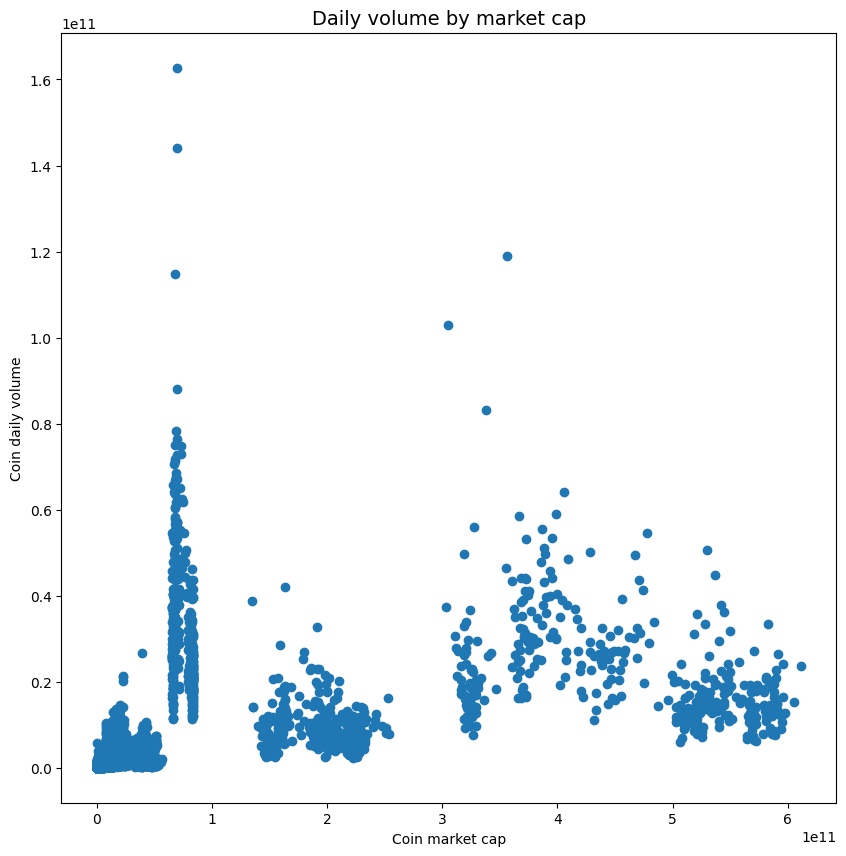

In [75]:
fig, axes = plt.subplots(figsize = (10,10))

plt.scatter(coinhis['marketCap'], coinhis['volume'])

plt.title('Daily volume by market cap', fontsize = 14)
plt.xlabel('Coin market cap', fontsize = 10)
plt.ylabel('Coin daily volume', fontsize = 10)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
2)تغییرات هم سو
</font>
</p>

In [76]:
names=list(coin['name'])
name_per=list(combinations(names,2))

In [78]:
s_dir=[]
for iter in name_per:
    first=coinhis[coinhis['name']==iter[0]][['Date','DailyChange']]
    second=coinhis[coinhis['name']==iter[1]][['Date','DailyChange']]
    counter=0
    for k in range(min(len(first),len(second))):
        if (first.iloc[k]['DailyChange'] * second.iloc[k]['DailyChange'])>=0:
            counter+=1
    s_dir.append((counter,iter[0],iter[1]))

In [79]:
s_dir.sort(key=lambda x:x[0],reverse=True)

In [80]:
pd.DataFrame(s_dir[:30],columns=['count',
            'first coin',
            'second coin'],index=list(range(1,31)))

,count,first coin,second coin
1,350,Bitcoin,Wrapped Bitcoin
2,322,Decentraland,The Sandbox
3,317,Ethereum,Gnosis
4,316,Enjin Coin,The Sandbox
5,316,Ethereum,Wrapped Bitcoin
6,310,Ankr,Zilliqa
7,309,Axie Infinity,The Sandbox
8,309,Decentraland,Oasis Network
9,309,Decentraland,VeChain
10,309,ICON,The Sandbox



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
4)ماتریس هم بستگی</font>
</p>

In [81]:
h_M=list(coin.sort_values('rank')[:16]['name'])

In [82]:
H=dict()
for i in h_M:
    c=np.array(coinhis[coinhis['name']==i]['marketCap'].values)
    delta=c[1:]-c[:len(c)-1]
    H[i]=delta

In [83]:
data=pd.DataFrame(H)

In [84]:
data

,Bitcoin,Ethereum,Tether USDt,BNB,XRP,USD Coin,Cardano,Dogecoin,Solana,TRON,Polkadot,Dai,Polygon,Toncoin,Litecoin,Shiba Inu
0,26571014000,7149994000,17998000,1108000800,921600000,-17299500,359549900,288180200,446300200,-96440300,323610100,1730000,239290400,-101139900,272670200,103960000
1,8352989000,2960999000,-8896000,471298000,628899900,9599000,238280700,76849200,386479600,153140200,164399600,270400,170480100,7930300,90509800,123400200
2,-31593005000,-9287991000,-65503000,-1252999100,-924198900,-107700200,-175840200,-416499700,-502109700,-84160000,130230300,-470100,-292150200,-716360200,-246770100,-82590200
3,-338985000,605995000,16105000,-55400500,31598600,-100400,-140510200,-38389800,93760000,101910000,-353200100,-290300,-56499700,12850200,-13160000,-109749800
4,-1601011000,-1347994000,1499000,-306700300,-19800100,-30199800,-88450100,-43599900,-209260000,-7020000,13069800,-1549800,-73170500,-165280200,-26480100,27710000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,-8682012000,-8356003000,-4100000,-2596401000,-752600000,-97898000,-554399700,-281360400,-735400900,-97300000,-347320400,12010000,-191879700,-244050050,-221090050,-139139600
359,18641027000,6758006000,4001000,2261500000,533799900,264900000,1232499700,498080200,451700700,202540000,527300100,43480000,546369600,18640000,433580050,328709600
360,3318972000,-4855005000,1598000,347902000,-57700300,25699000,135400400,64849900,-30600200,52250100,4280400,1770000,65120200,-256889980,34010100,122460200
361,-2981986000,-2559000000,803000,-171999000,-90799200,-19002000,-775800800,-70680000,-353000400,-37690300,-97380400,97949700,-43019700,-3180030,-54910220,-285590000


<Axes: title={'center': 'Correlation Matrix'}>

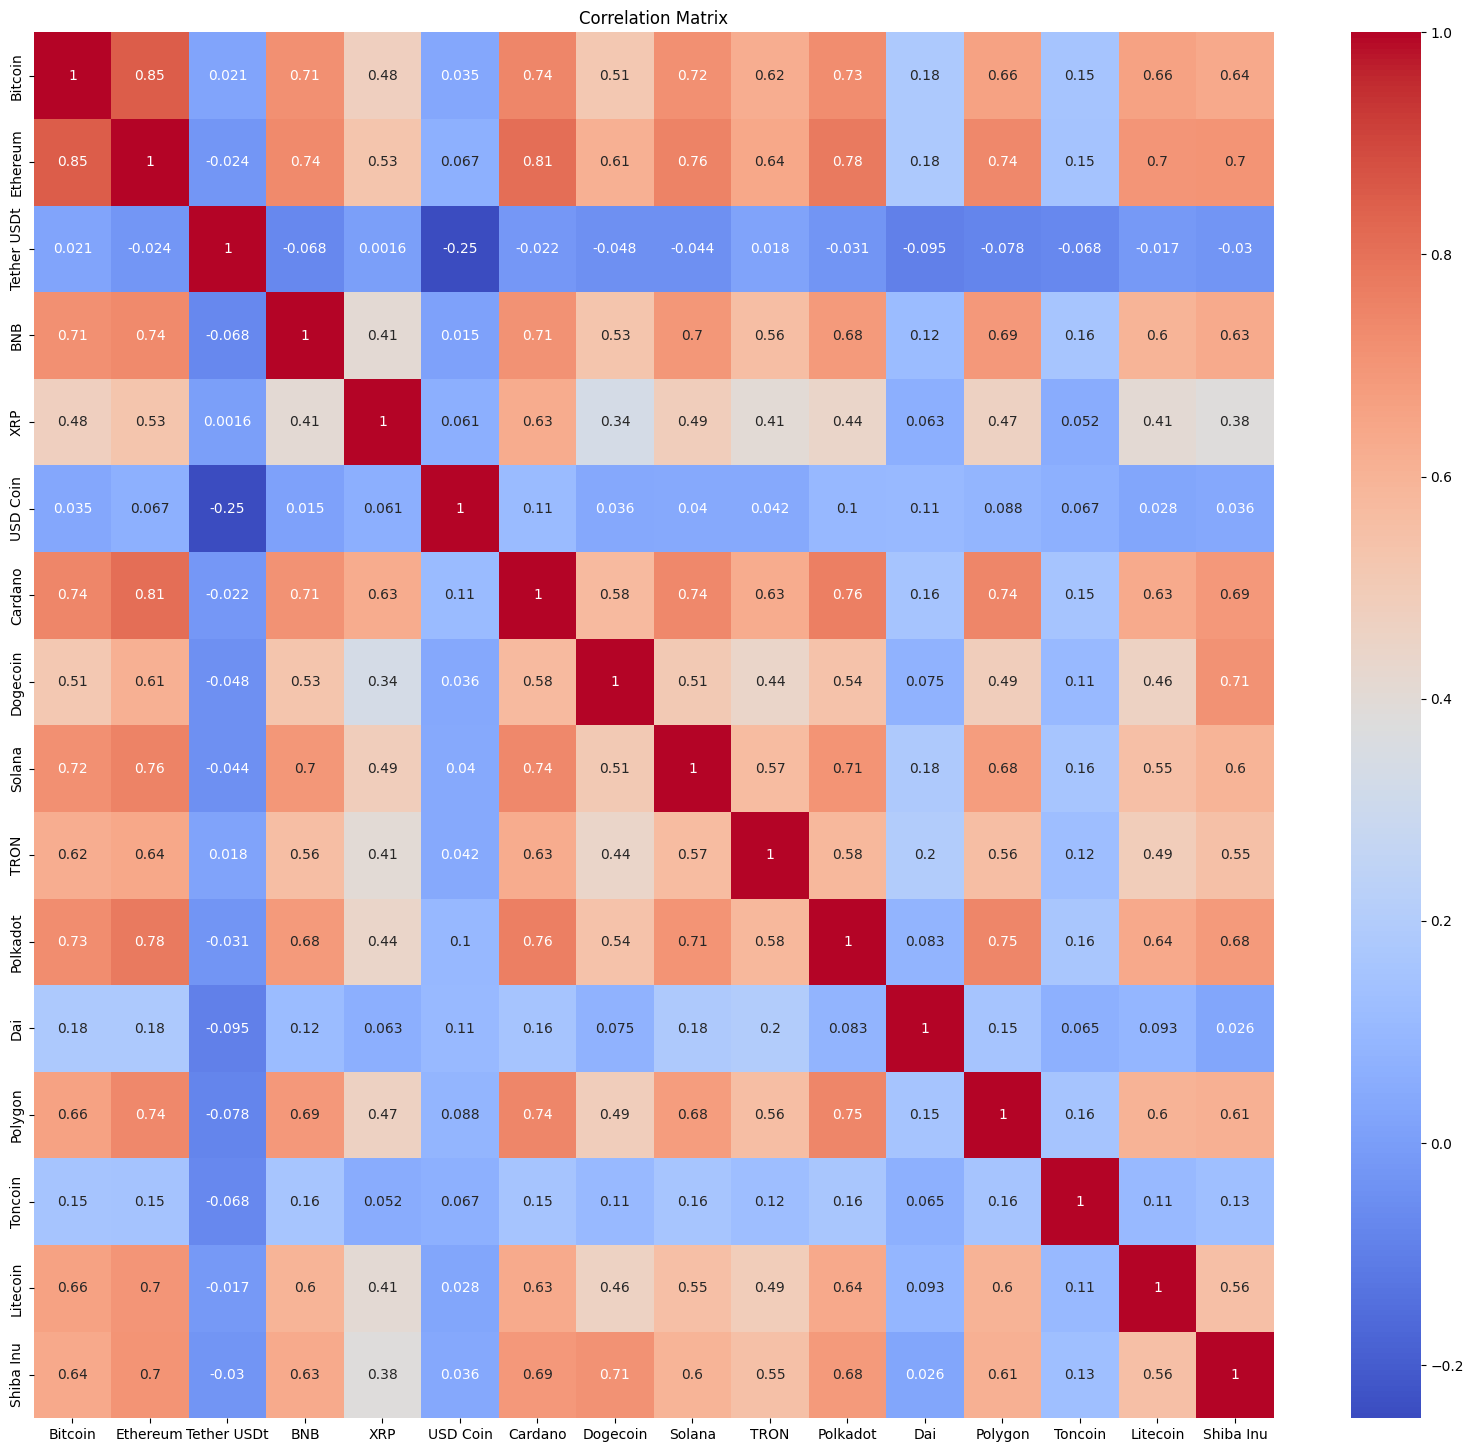

In [85]:
f, AX_1= plt.subplots(figsize=(20,18))
AX_1.set_title('Correlation Matrix')
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',ax=AX_1)

5

In [176]:
coinhis['Date'] = pd.to_datetime(coinhis['Date'])

In [177]:
rg=coinhis[((coinhis['Date'].dt.month==3)|(coinhis['Date'].dt.month==4)|(coinhis['Date'].dt.month==5))][['name','Date','DailyChange']]

In [178]:
rg

,name,Date,DailyChange
92,Synthetix,2023-05-31,-0.078027
93,Synthetix,2023-05-30,-0.007736
94,Synthetix,2023-05-29,-0.083339
95,Synthetix,2023-05-28,0.091621
96,Synthetix,2023-05-27,-0.003457
...,...,...,...
70145,Render,2023-03-05,-0.040676
70146,Render,2023-03-04,-0.118711
70147,Render,2023-03-03,-0.170701
70148,Render,2023-03-02,-0.032350


In [179]:
April=list(range(1,31))
May_M=list(range(1,32))

In [180]:
col=[]
for i in [(3,May_M),(4,April),(5,May_M)]:
    for j in i[1]:
        d=rg[(rg['Date'].dt.month==i[0])&(rg['Date'].dt.day==j)]
        n=0.35*len(d)
        if sum(d['DailyChange']>=0)<n:
            col.extend(rg[(rg['Date']=='2023-{}-{}'.format(i[0],j))&(rg['DailyChange']>=0)]['name'])
col.sort()
my_dict = {i:col.count(i) for i in col}
v_dict={k: v for k, v in sorted(my_dict.items(), key=lambda item: item[1],reverse=True)}
top10=list(v_dict.keys())[:10]


In [181]:
top10

['USD Coin',
 'Tether Gold',
 'PAX Gold',
 'Dai',
 'Tether USDt',
 'USDD',
 'UNUS SED LEO',
 'MX TOKEN',
 'Pax Dollar',
 'TrueUSD']

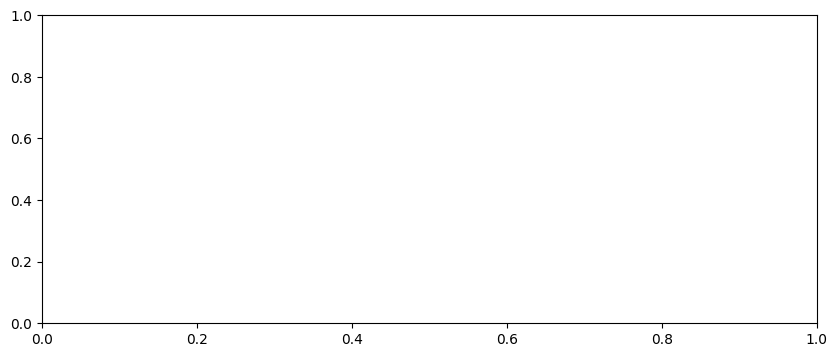

In [182]:
fig , ax = plt.subplots(figsize=(10, 4))
#ax.bar(top10,y)

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تخمین
</font>
</h1>

In [199]:
sample=np.random.choice(names,size=40)
sample_mean=[]
sample_std=[]
for i in sample:
    sample_mean.append(np.mean(coinhis[coinhis['name']==i]['volume']))
    sample_std.append(np.std(coinhis[coinhis['name']==i]['volume']))


In [200]:
sample

array(['Stacks', 'UNUS SED LEO', 'Toncoin', 'ApeCoin', 'Render', 'FLOKI',
       'Qtum', 'Ethereum Classic', 'Arbitrum', 'Stellar', 'Merit Circle',
       'Amp', 'Polygon', 'Dai', 'Siacoin', 'UNUS SED LEO', 'Polkadot',
       'THORChain', 'MX TOKEN', 'Theta Fuel', 'Core', 'Theta Fuel',
       'JUST', 'dYdX', 'Mina', 'Bone ShibaSwap', 'Horizen', 'Aragon',
       'Alchemy Pay', 'Dash', 'MobileCoin', 'Klaytn', 'Enjin Coin',
       'Frax Share', 'Kusama', 'GateToken', 'Stellar',
       'Basic Attention Token', 'Rocket Pool', 'Waves'], dtype='<U24')

In [203]:
# lower_bound = sp.stats.t.ppf(0.02,df=39,loc=sample_mean,scale=sample_std)
# upper_bound= sp.stats.t.ppf(1-(0.02),df=39,loc=sample_mean,scale=sample_std)

In [205]:
t_score = sp.stats.t.ppf((1 + 0.98) / 2, df=40 - 1)
margin_of_error = t_score * (sample_std / np.sqrt(40))
lower= sample_mean - margin_of_error
upper= sample_mean + margin_of_error

In [206]:
for i,j in enumerate(sample):
    print(j,'(',lower[i],',',upper[i],')')

Stacks ( 27383765.927712426 , 124691115.8854744 )
UNUS SED LEO ( 1420165.1126583398 , 2243616.5411878144 )
Toncoin ( 18073410.649408683 , 30024994.900041863 )
ApeCoin ( 96861944.62811628 , 170988968.5586969 )
Render ( 42123204.838738665 , 102558514.55686574 )
FLOKI ( 7946602.422465207 , 36171894.94017216 )
Qtum ( 29973851.642212935 , 53643380.77536949 )
Ethereum Classic ( 142360806.26008916 , 397153053.63002074 )
Arbitrum ( 228764518.90957478 , 576456577.3867215 )
Stellar ( 57147056.500300534 , 133616908.33486432 )
Merit Circle ( 2542856.9442061703 , 6950283.803046577 )
Amp ( 3744269.4363426547 , 14927478.475745259 )
Polygon ( 313972259.9177461 , 534048273.0492868 )
Dai ( 111007706.25422437 , 326342180.0095119 )
Siacoin ( -777173.0271922592 , 20503714.983236216 )
UNUS SED LEO ( 1420165.1126583398 , 2243616.5411878144 )
Polkadot ( 158024232.35071442 , 250541889.077857 )
THORChain ( 27276140.271426518 , 48103675.11318888 )
MX TOKEN ( 2056671.3740806389 , 3955902.8944125115 )
Theta Fuel (

In [207]:
# for i,j in enumerate(sample):
#     print(j,'(',lower_bound[i],',',upper_bound[i],')')